<center>

# <span style="color:red; font-size:70px;"> Modello di Ising 2D</span>

</center>

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import ellipk

<center>

<span style="color:blue; font-size:50px;"> Magnetizzazione</span>

</center>

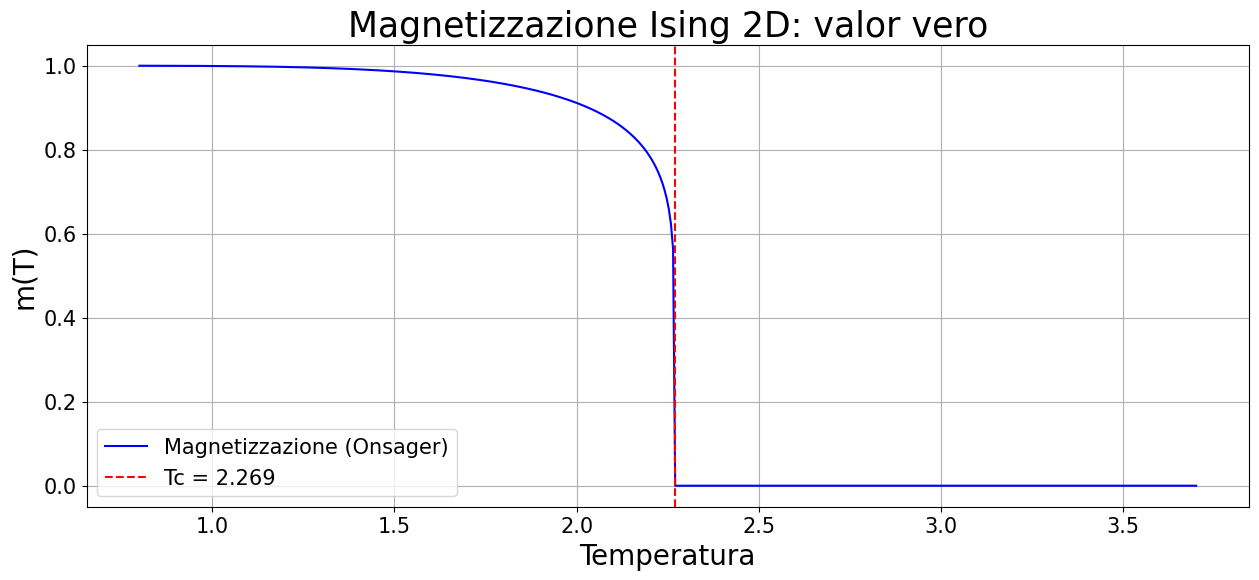

In [ ]:
T = np.linspace(0.8, 3.7, 500)
J = 1  
Tc = 2 * J/math.log(1 + np.sqrt(2))

# Funzione per calcolare la magnetizzazione (soluzione di Onsager)
def magnOnsager(T, J, Tc):

    if T > Tc:
        m = 0
    else:
        m = np.sinh(2*J/T)
        m = (1 - m**(-4))**(1/8)
    
    return m


# Calcolo della magnetizzazione per ogni temperatura
m = []
for t in T:
    m.append(magnOnsager(t, J, Tc))

# Creazione del grafico
plt.figure(figsize=(15, 6))
plt.plot(T, m, label=r'Magnetizzazione (Onsager)', color='b')
plt.axvline(x=Tc, color='r', linestyle='--', label=f'Tc = {Tc:.3f}')
plt.xlabel('Temperatura', fontsize = 20)
plt.ylabel('m(T)', fontsize = 20)
plt.title('Magnetizzazione Ising 2D: valor vero', fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc = 'lower left', fontsize = 15)
plt.grid(True)
plt.show()

<center>

<span style="color:blue; font-size:50px;"> Energia interna</span>

</center>

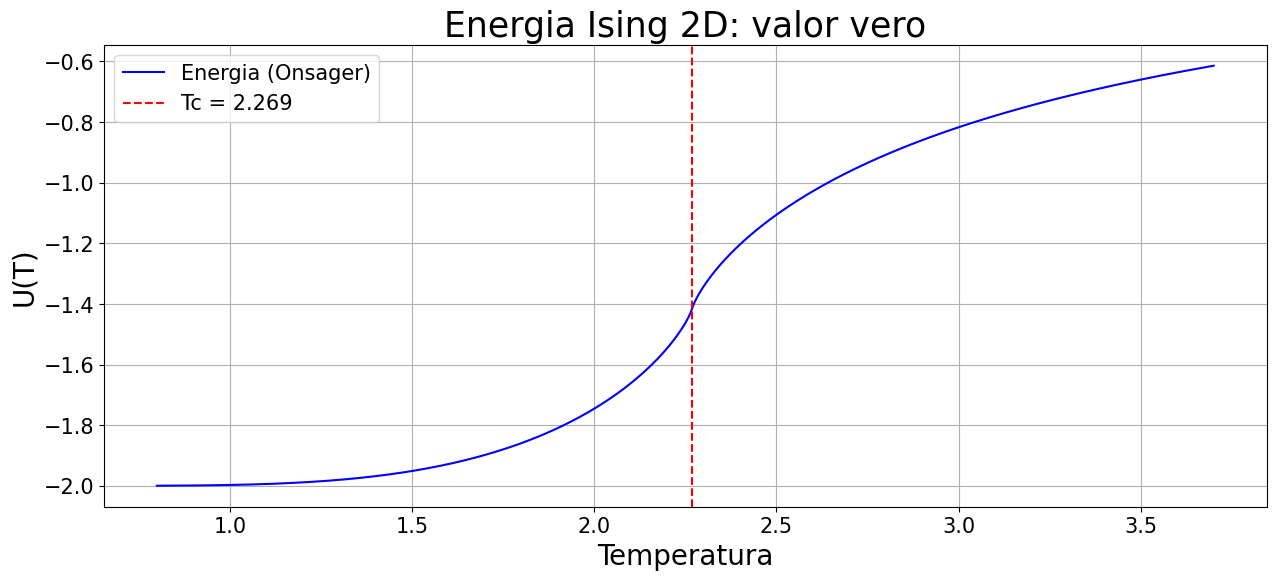

In [5]:
T = np.linspace(0.8, 3.7, 500)
J = 1  
Tc = 2 * J/math.log(1 + np.sqrt(2))

# Funzione per calcolare la magnetizzazione (soluzione di Onsager)
def eneOnsager(T, J):
    
    # Fattore che compare in tutti gli argomenti
    betaJ = J/T
    
    # Componenti per calcolo energia
    k = 2*np.sinh(2*betaJ)/pow(np.cosh(2*betaJ), 2)
    k1 = 2*pow(np.tanh(2*betaJ), 2) - 1
    intE = ellipk(k**2)

    ene = -J * np.cosh(2*betaJ)/np.sinh(2*betaJ) * (1 + 2/np.pi * k1 * intE)

    return ene


# Calcolo della magnetizzazione per ogni temperatura
en = []
for t in T:
    en.append(eneOnsager(t, J))

# Creazione del grafico
plt.figure(figsize=(15, 6))
plt.plot(T, en, label=r'Energia (Onsager)', color='b')
plt.axvline(x=Tc, color='r', linestyle='--', label=f'Tc = {Tc:.3f}')
plt.xlabel('Temperatura', fontsize = 20)
plt.ylabel('U(T)', fontsize = 20)
plt.title('Energia Ising 2D: valor vero', fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.legend(loc = 'upper left', fontsize = 15)
plt.grid(True)
plt.show()

<center>

# <span style="color:green; font-size:60px;"> Dipendenza da J</span>

</center>

In [17]:
temp = np.array(['1.0','1.5','2.0','2.1','2.15','2.2','2.25','2.5','3.0','3.5'])
t_camp = np.array([1.0, 1.5, 2.0, 2.1, 2.15, 2.2, 2.25, 2.5, 3.0, 3.5])

In [19]:
size = '100'

ene_J1_100 = np.zeros(len(temp))
ene_J1_100_err = np.zeros(len(temp))

magn_J1_100 = np.zeros(len(temp))
magn_J1_100_err = np.zeros(len(temp))


# Ciclo sulle varie temperature
for i in range(0, len(temp)):

    name = 'dipJ/dipJ_t' + temp[i] + '_J1.0.out'
    obs = np.loadtxt(name)


    # Valuto i valori medi
    ene_J1_100[i] = np.mean(obs[:, 1])
    ene_J1_100_err[i] = np.std(obs[:, 1], ddof=1)

    magn_J1_100[i] = np.mean(obs[:, 2])
    magn_J1_100_err[i] = np.std(obs[:, 2], ddof=1)

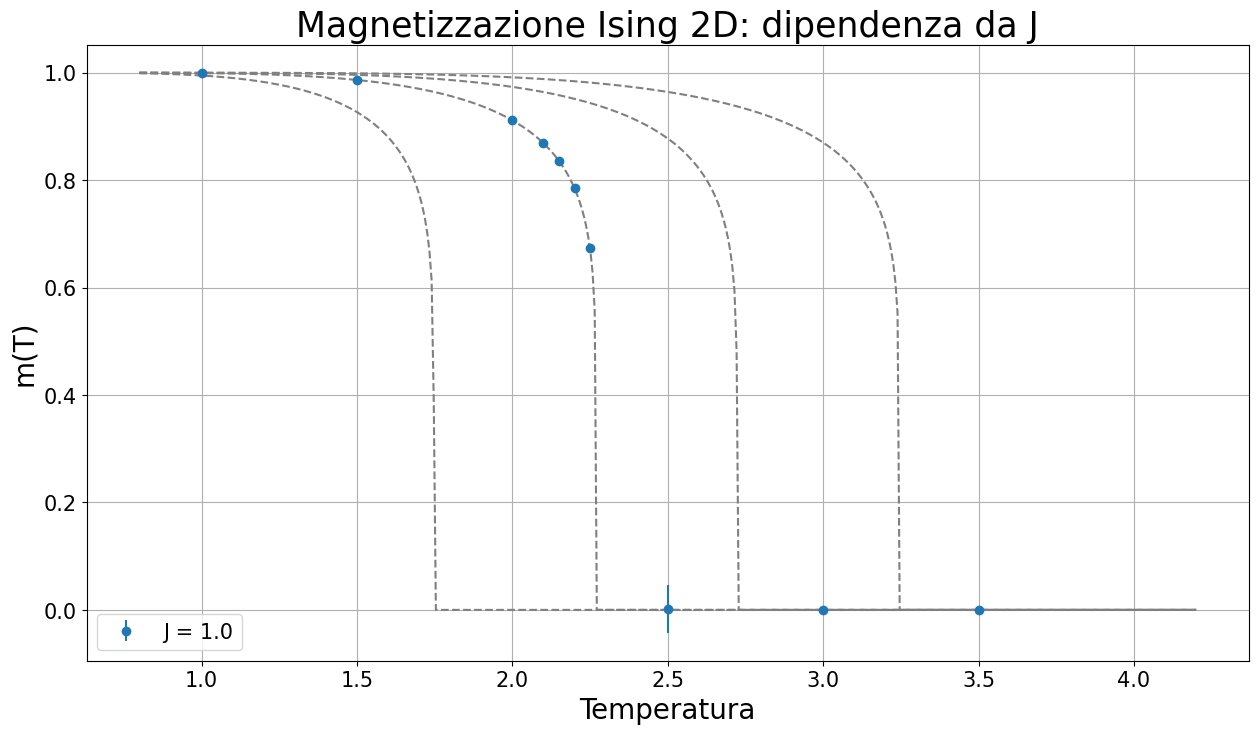

In [21]:
T = np.linspace(0.8, 4.2, 500)
J = np.array([0.77, 1.0, 1.2, 1.43])

Tc = np.array([
    2 * J[i]/math.log(1 + np.sqrt(2)) for i in range(0, 4)
])

# Funzione per calcolare la magnetizzazione (soluzione di Onsager)
def magnOnsager(T, J, Tc):

    if T > Tc:
        m = 0
    else:
        m = np.sinh(2*J/T)
        m = (1 - m**(-4))**(1/8)
    
    return m


# Calcolo della magnetizzazione per ogni temperatura
m1 = []
m2 = []
m3 = []
m4 = []
for t in T:
    m1.append(magnOnsager(t, J[0], Tc[0]))
    m2.append(magnOnsager(t, J[1], Tc[1]))
    m3.append(magnOnsager(t, J[2], Tc[2]))
    m4.append(magnOnsager(t, J[3], Tc[3]))

# Creazione del grafico
plt.figure(figsize=(15, 8))
plt.plot(T, m1, linestyle='--', color='grey')

plt.plot(T, m2, linestyle='--', color='grey')
plt.errorbar(t_camp, magn_J1_100, yerr = magn_J1_100_err, linestyle = 'None', fmt = 'o', label = 'J = 1.0')

plt.plot(T, m3, linestyle='--', color='grey')
plt.plot(T, m4, linestyle='--', color='grey')

plt.xlabel('Temperatura', fontsize = 20)
plt.ylabel('m(T)', fontsize = 20)
plt.title('Magnetizzazione Ising 2D: dipendenza da J', fontsize = 25)
plt.tick_params(axis='both', which='major', labelsize=15)

plt.legend(loc = 'lower left', fontsize = 15)
plt.grid(True)
plt.show()